<a href="https://colab.research.google.com/github/ksetdekov/Barbell-Lifts-Classification/blob/master/analysis_and_fx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
from fbprophet import Prophet
import pandas as pd
import seaborn as sns


In [2]:
%matplotlib inline

In [4]:
data_url = 'https://raw.githubusercontent.com/ksetdekov/test_predict_ts/main/2_5350833418869411277.csv?token=AD3AH34GLO7WLLTDQ6D7X6LAYJSRI'
data = pd.read_csv(data_url)
data

,date,clients
0,1/2/2010 0:00,129.0
1,1/2/2010 1:00,148.0
2,1/2/2010 2:00,159.0
3,1/2/2010 3:00,181.0
4,1/2/2010 4:00,138.0
...,...,...
43795,NaN,NaN
43796,NaN,NaN
43797,NaN,NaN
43798,NaN,NaN


In [5]:
data.tail(30)

,date,clients
43770,12/30/2014 18:00,79.0
43771,12/30/2014 19:00,35.0
43772,12/30/2014 20:00,26.0
43773,12/30/2014 21:00,20.0
43774,12/30/2014 22:00,8.0
43775,12/30/2014 23:00,16.0
43776,NaN,NaN
43777,NaN,NaN
43778,NaN,NaN
43779,NaN,NaN


In [6]:
data.date = pd.to_datetime(data.date)

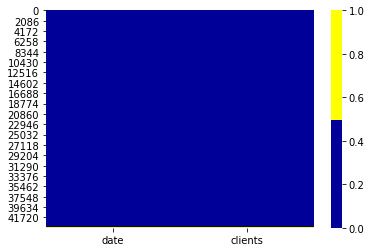

In [7]:
colors = ['#000099', '#ffff00'] 

a = sns.heatmap(data.isnull(), cmap=sns.color_palette(colors))

Визуально пропусков не подавляющее число

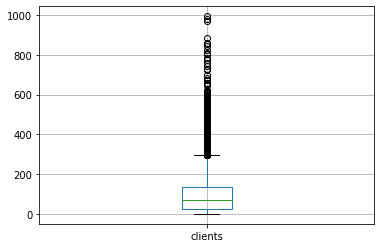

In [8]:
data.boxplot(column=['clients'])

In [9]:
data.describe()

,clients
count,43776.000000
mean,94.059553
std,92.256575
min,0.000000
25%,24.000000
50%,68.000000
75%,133.000000
max,994.000000


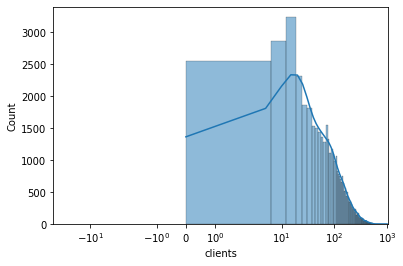

In [10]:
ax = sns.histplot(data=data, x="clients", kde=True)
ax.set_xscale('symlog')

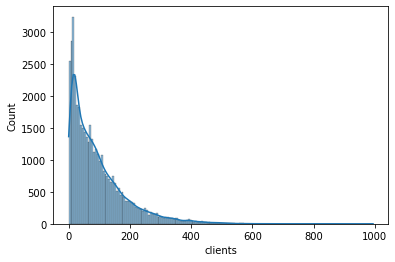

In [11]:
sns.histplot(data=data, x="clients", kde=True)

Целевая переменная с тяжелым правым хвостом, наблюдаемые значение имеют положительную ассиметрию, мода меньше среднего, все наблюдаемые значения $< 1000$.

In [12]:
misscount = data.isna().sum()
misscount[misscount>0]

date       24
clients    24
dtype: int64

Есть предположение, что 0 могуть быть пропусками, других пропусков, кроме хвоста датасета нет.

# FB prophet

In [13]:
df=data.copy()
df.dropna(inplace=True)
df.columns =['ds', 'y']
df['cap'] = 2000
df['floor'] = 0
df.head()

,ds,y,cap,floor
0,2010-01-02 00:00:00,129.0,2000,0
1,2010-01-02 01:00:00,148.0,2000,0
2,2010-01-02 02:00:00,159.0,2000,0
3,2010-01-02 03:00:00,181.0,2000,0
4,2010-01-02 04:00:00,138.0,2000,0


In [ ]:
# m = Prophet(growth = 'logistic',  daily_seasonality=24)
m = Prophet(mcmc_samples=300)

m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=48, freq='H')
future['cap'] = 2000
future['floor'] = 0
future.head()

In [ ]:
future

In [ ]:
fcst = m.predict(future)
fig = m.plot(fcst)

In [ ]:
fig = m.plot_components(fcst)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

Так себе прогноз

In [ ]:
fig = m.plot(fcst)
ax = fig.gca()
ax.set_xlim(pd.to_datetime(['2014-12-15 00:00:00', '2015-01-01 23:00:00'])) 
ax.set_ylim([0, 500]) 